## Difusión térmica en la corteza terrestre.

Un ejemplo clásico de un problema de difusión con una condición límite variable en el tiempo es la difusión de calor en la corteza terrestre, ya que la temperatura de la superficie varía con las estaciones. Suponga que la temperatura media diaria en un punto particular de la superficie varía como:

$$T_{0}(t)=A+Bsin\frac{2\pi t}{\tau }$$

donde $τ = 365$ días, $A = 10°C$ y $B = 12°C$. A una profundidad de $20 m$ debajo de la superficie, casi todas las variaciones anuales de temperatura se eliminan y la temperatura es, en buena aproximación, una constante de $11°C$ (que es más alta que la temperatura media de la superficie de $10°C$: la temperatura aumenta con la profundidad, debido al calentamiento del núcleo caliente del planeta). La difusividad térmica de la corteza terrestre varía un poco de un lugar a otro, pero para nuestros propósitos la trataremos como constante con un valor $D = 0.1 m^{2} día^{-1}$.

Escriba un programa, para calcular el perfil de temperatura de la corteza en función de la profundidad de hasta 20 my el tiempo de hasta 10 años. Comience con una temperatura en todas partes igual a $10°C$, excepto en la superficie y en el punto más profundo, elija valores para el número de puntos de cuadrícula y el paso de tiempo h, luego ejecute su programa durante los primeros nueve años simulados, para permitir que se asiente abajo en cualquier patrón que alcance. Luego, para el décimo y último año, grafique cuatro perfiles de temperatura tomados a intervalos de 3 meses en un solo gráfico para ilustrar cómo cambia la temperatura en función de la profundidad y el tiempo.

In [1]:
from numpy import empty
from pylab import plot, xlabel, ylabel, show,figure

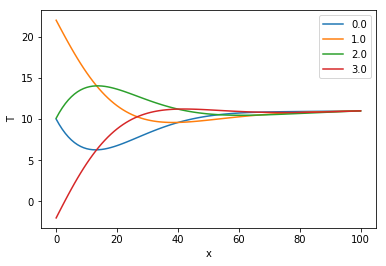

In [3]:
from pylab import *

A = 10
B = 12
tau = 365
D = 0.1
def T0(t):
    return A + B*sin(2*pi*t/tau)

L = 20   # profundidad en metros
D = 0.1  # Difusividad térmica
N = 100  # Número de divisiones en cuadrícula
a = L/N  # Espaciado de la cuadrícula
h = 0.01 # Pasos de tiempo


T = zeros(N+1,float)
T[1:N]=10


def iterate(T,t_min,t_max):
    
    # programa principal
    t = t_min
    c = h*D/a**2

    while t<t_max:
    
        # Calculando los nuevos valores de T
        
        T[0] = T0(t)
        T[N] = 11
        T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
            
       
        t += h
    return T


T9 = iterate(T,0,365*9)

T9_i = T9
t_min = 365*9
for t_max in [365*9 + i*(365//4) for i in range(4)]:
    T9_i = iterate(T9_i,t_min,t_max)
    plot(T9_i,label=t_max%365/(365//4))
    t_min = t_max


legend()
xlabel("x") # x es la profundida
ylabel("T") # T es la temperatura
show()

En la grafica podemos óbservar el comportamiento que tiene la temperatura de la corteza terrestre 
a medida que aumenta la profundidad, esta relación se da en la evolución del tiempo. 

Esta representación está dada para un año en intervalor de 3 meses, cada una de la lineas representa dicho 
comportamiento, siendo la azul la del primer trimestre, la amarilla para el sugundo trimestre, la verde
para el tercer trimestre y la roja representa el último trimestre.

Por tanto podemos que las energias varian en los primeros metros de profundidad para luego finalmente tender a un valor constante, lo que indica que la funcion genera variaciones en el valor de la temperatura.